### Analysis of bikes trajectories

*Authors: Liubov.* Code is inspired by researchers from CityLab Berlin (Alexandra).

This is inspired by the workshop https://github.com/technologiestiftung/bike-sharing and data shared by Citylab Berlin scientists. Thanks to Alexandra Kapp and Fabien for inspiration and data, code and ideas sharing.

One can do analysis similar to one which I did with other trajectories for mobility https://github.com/Liyubov/mobility_analysis
Work in progress. If you find errors, please let me know.

Here we analyze trajectories of bikes. Data are depersonalised and no privacy issues should rise from this pure research work.

For bulications see:
    1. analysis of Velibs "Analysis of bike sharing system by clustering : the Vélib "
    2. analysis of bike sharing systems

In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import csv


# load data on trajectories, it is very heavy 

df_traj = pd.read_csv('C:/Users/lyubo/Documents/DATA_networks/mobilitydata/bikes_sharing_data_technologiestiftung_berlin/trajectories_bikes_data_cleaned.csv')

print(df_traj.shape)



(3626252, 22)


In [2]:
df_traj.head(50)


,id,id.1,bikeId,providerId,timestamp,latitude,longitude,prev_id,next_id,prev_lat,...,next_lon,end_timestamp,mode,response,geometry,distance,calc_time,waypoints,duration,speed
0,1,1,13001,0,2019-04-05 08:20:04.689917,52.510327,13.405788,13001.0,13001.0,52.536506,...,13.405788,2019-04-05 13:44:04.154419,accessible,NaN,NaN,NaN,NaN,NaN,0 days 05:23:59.464502000,NaN
1,2,2,13001,0,2019-04-05 13:44:04.154419,52.510327,13.405788,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:16:03.582939,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.405853, 52.510328], [13.4...",3238.3,939.0,"[{'name': 'Neue Grünstraße', 'hint': 'OmIBgK6Q...",0 days 04:31:59.428520000,0.714356
2,3,3,13001,0,2019-04-05 18:16:03.582939,52.532190,13.421259,13001.0,13001.0,52.510327,...,13.421259,2019-04-05 18:20:04.351730,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:04:00.768791000,NaN
3,4,4,13001,0,2019-04-05 18:20:04.351730,52.532190,13.421259,13001.0,13001.0,52.532190,...,13.421317,2019-04-05 18:24:03.220242,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:03:58.868512000,NaN
4,5,5,13001,0,2019-04-05 18:24:03.220242,52.532183,13.421317,13001.0,13001.0,52.532190,...,13.421317,2019-04-06 12:48:04.815239,accessible,NaN,NaN,NaN,NaN,NaN,0 days 18:24:01.594997000,NaN
5,6,6,13001,0,2019-04-06 12:48:04.815239,52.532183,13.421317,13001.0,13001.0,52.532183,...,13.418194,2019-04-06 13:52:04.318176,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.421322, 52.532191], [13.4...",516.4,180.8,"[{'name': 'Raabestraße', 'hint': '7kIAgPNCAICh...",0 days 01:03:59.502937000,0.484188
6,7,7,13001,0,2019-04-06 13:52:04.318176,52.529784,13.418194,13001.0,13001.0,52.532183,...,13.418194,2019-04-07 11:16:05.033710,accessible,NaN,NaN,NaN,NaN,NaN,0 days 21:24:00.715534000,NaN
7,8,8,13001,0,2019-04-07 11:16:05.033710,52.529784,13.418194,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 11:40:05.615470,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.418193, 52.529784], [13.4...",2388.2,643.3,"[{'name': 'Prenzlauer Allee', 'hint': 'mxYFgHo...",0 days 00:24:00.581760000,5.968089
8,9,9,13001,0,2019-04-07 11:40:05.615470,52.515599,13.398198,13001.0,13001.0,52.529784,...,13.398198,2019-04-07 12:08:04.375297,accessible,NaN,NaN,NaN,NaN,NaN,0 days 00:27:58.759827000,NaN
9,10,10,13001,0,2019-04-07 12:08:04.375297,52.515599,13.398198,13001.0,13001.0,52.515599,...,13.376464,2019-04-07 12:24:04.827844,trip,{'routes': [{'geometry': {'coordinates': [[13....,"{'coordinates': [[13.398264, 52.515487], [13.3...",1783.2,514.4,"[{'name': 'Werderscher Markt', 'hint': 'QFkAgP...",0 days 00:16:00.452547000,6.683849


In [6]:
print(df_traj.columns)

Index(['id', 'id.1', 'bikeId', 'providerId', 'timestamp', 'latitude',
       'longitude', 'prev_id', 'next_id', 'prev_lat', 'prev_lon', 'next_lat',
       'next_lon', 'end_timestamp', 'mode', 'response', 'geometry', 'distance',
       'calc_time', 'waypoints', 'duration', 'speed'],
      dtype='object')


## Estimate distribution of bikes trips 
Spatial distribution properties.

In [14]:
import numpy as np
from matplotlib import pyplot as plt

# find unique values in column bikeid
bike_ids = np.unique(df_traj.bikeId.values)
print('number of unique bike ids ', len(bike_ids))


def calc_jump_dist(Xarray,Yarray): #function to calculate distribution of steps  # given arrays Xarray, Yarray of trajectories
    dist = np.zeros(len(Xarray))
    for i in range(0, len(Xarray)-1):
        dist[i] = calc_dist(Xarray[i],Xarray[i+1],Yarray[i],Yarray[i+1])
    return dist
    
def calc_dist(x1,x2,y1,y2): #function to calculate distance between 2 points in 2D
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))

def plot_dist_from_traj(df_id, bikeid):
    # assign values to coordinates
    X_tr = df_id.latitude.values
    Y_tr = df_id.longitude.values
    
    # now we apply this function to routes dataframe
    jumps_lengths = calc_jump_dist(X_tr,Y_tr)

    # now we are plotting the histogram 
    plt.hist(jumps_lengths, bins=20, alpha=0.2) # alpha is transparency parameter
    plt.xlabel('distance')
    plt.ylabel('frequency')
    plt.title('distribution for bike '+str(bikeid))
    #ax.set_xscale('log')
    #plt.show()




number of unique bike ids  15252


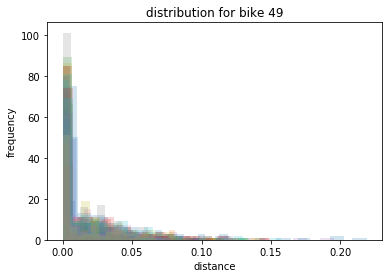

In [15]:
# loop through all bikIds  
for ind_bikeid in range(0, 50): #len(bike_ids)): #5): #
    df_id = df_traj[df_traj.bikeId == bike_ids[ind_bikeid]]
    plot_dist_from_traj(df_id, ind_bikeid)
plt.show()    
    #make transparent plot


### Plot trajectories of bikes 
We can plot it on a map or outside the map.

Index(['id', 'id.1', 'bikeId', 'providerId', 'timestamp', 'latitude',
       'longitude', 'prev_id', 'next_id', 'prev_lat', 'prev_lon', 'next_lat',
       'next_lon', 'end_timestamp', 'mode', 'response', 'geometry', 'distance',
       'calc_time', 'waypoints', 'duration', 'speed'],
      dtype='object')


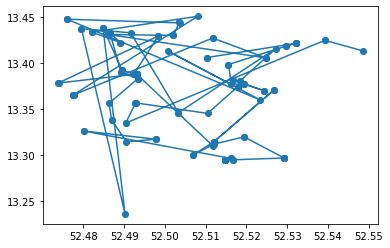

In [4]:
from matplotlib import pyplot as plt


#choose trajectory of the first bike

print(df_traj.columns)

first_traj = df_traj[df_traj.bikeId == 13001]
#print(first_traj.shape)


# we can transfer latitude -> x, longitude -> y 
plt.plot(first_traj.latitude, first_traj.longitude, 'o-')
plt.show()

number of unique bike ids  15252


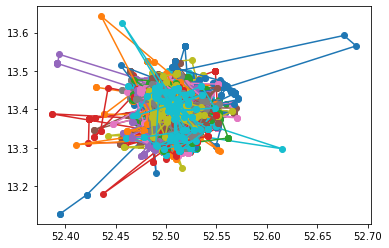

In [6]:
from matplotlib import pyplot as plt
import numpy as np

# find unique values in column bikeid
bike_ids = np.unique(df_traj.bikeId.values)
print('number of unique bike ids ', len(bike_ids))


#choose trajectory of bikes
#print(df_traj.columns)
for bike_ind in range(0, 100):#len(bike_ids)): 
    first_traj = df_traj[df_traj.bikeId == bike_ids[bike_ind]]
    plt.plot(first_traj.latitude, first_traj.longitude, 'o-')
plt.show()

### Observations
Bikes trajectories are clearly having some long sporadic jumps, which can be characterized by CTRW. (analysis below).

Questions:
    Can we characterize each trajectory properties (long enough?) 
    Can we infer fluxes of people, e.g. using flow-networks measures?

In [ ]:

### First we calculate the distribution P(\delta) of jumps for the first trajectory
import numpy as np
import seaborn


def calc_jump_dist(Xarray,Yarray): #function to calculate distribution of steps  # given arrays Xarray, Yarray of trajectories
    dist = np.zeros(len(Xarray))
    for i in range(0, len(Xarray)-1):
        dist[i] = calc_dist(Xarray[i],Xarray[i+1],Yarray[i],Yarray[i+1])
    return dist
    
    
    
def calc_dist(x1,x2,y1,y2): #function to calculate distance between 2 points in 2D
    return np.sqrt((x1-x2)*(x1-x2)+(y1-y2)*(y1-y2))



# assign values 
X_tr = first_traj.x.values
Y_tr = first_traj.y.values


# make sure that we get the right type of the data on both axis

print(type(X_tr))

# now we apply this function to routes dataframe
jumps_lengths = calc_jump_dist(X_tr,Y_tr)



# now we are plotting the histogram 
plt.hist(jumps_lengths, bins=20)

#ax.set_xscale('log')
plt.show()

seaborn.distplot(jumps_lengths, bins=20)
plt.show()    
    